# xml to txt file 순서

1. To convert xml to YOLO V8 annotation files
    - xml 파일 속 라벨을 각각 txt 파일로 변환하여 labels 폴더에 위치시키기

2. Checking bounding box
    - txt 파일로 이미지에 bounding box 그려보기


# ENV

In [ ]:
# !pip install lxml

In [ ]:
import numpy as np
import lxml
import os
import glob

from lxml import etree

In [ ]:
# 가끔 NotImplementedError 에러가 발생할 경우 다음 코드를 실행한다.
# NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

import locale
locale.getpreferredencoding = lambda: "UTF-8"

# 1. To convert  xml to YOLO V8 annotation files

In [ ]:
# 원하는 dataset 구조
dataset
├─ train
│ ├─ images
│ └─ labels
├─ validation
│ ├─ images
│ └─ labels
└─ data.yaml

In [ ]:
CLASSES = ["car", "bus", "truck"]

def to_yolov8(y):
  """
  # change to yolo v8 format
  # [x_top_left, y_top_left, x_bottom_right, y_bottom_right] to
  # [x_center, y_center, width, height]
  """
  width = y[2] - y[0]
  height = y[3] - y[1]

  if width < 0 or height < 0:
      print("ERROR: negative width or height ", width, height, y)
      raise AssertionError("Negative width or height")
  return (y[0] + (width/2)), (y[1] + (height/2)), width, height

def load_xml_annotations(f):
  tree = etree.parse(f)
  anns = []
  for dim in tree.xpath("image"):
    image_filename = dim.attrib["name"]
    width = int(dim.attrib["width"])
    height = int(dim.attrib["height"])
    # print(image_filename)
    # print(len(dim.xpath("box")))
    boxes = []
    for box in dim.xpath("box"):
      label = CLASSES.index(box.attrib["label"])
      xtl, ytl = box.attrib["xtl"], box.attrib["ytl"]
      xbr, ybr = box.attrib["xbr"], box.attrib["ybr"]

      xc, yc, w, h = to_yolov8([float(xtl), float(ytl), float(xbr), float(ybr)])
      boxes.append([label, round(xc/width, 5), round(yc/height, 5), round(w/width, 5), round(h/height, 5)])

    anns.append([image_filename, width, height, boxes])

  return np.array(anns, dtype="object")

def write_yolov8_txt(folder, annotation):
  out_filename = folder + annotation[0][:-3] + 'txt'
  # print(out_filename)
  f = open(out_filename,"w+")
  for box in annotation[3]:
    f.write("{} {} {} {} {}\n".format(box[0], box[1], box[2], box[3], box[4]))


In [ ]:
# 경로 확인
HOME = os.getcwd()
print(HOME)

c:\Users\SBA\Downloads


### train labels

CH01 ~ CH04의 데이터만 사용할 예정


진행순서

1. for 문을 돌려서 전체 파일을 _로 split

2. 두번째에서 뒤에 한 자리를 인덱싱해서 4 이상은 무시

In [ ]:
# train의 xml이 위치한 경로
### 필요에 따라 경로를 수정
trian_data_path = os.path.join(HOME, '교통문제 해결을 위한 CCTV 교통 영상(고속도로)', 'Training', '바운딩박스', '[라벨]1.수도권영동선')
trian_data_path

'c:\\Users\\SBA\\Downloads\\교통문제 해결을 위한 CCTV 교통 영상(고속도로)\\Training\\바운딩박스\\[라벨]1.수도권영동선'

In [ ]:
# xml 폴더 리스트
train_xml_list = os.listdir(trian_data_path)
print("xml 폴더 리스트:\n", train_xml_list[:5])

trian_xml_count = len(train_xml_list)
print("xml 폴더 개수:\n", trian_xml_count)

xml 폴더 리스트:
 ['Suwon_CH01_20200720_1700_MON_9m_NH_highway_TW5_sunny_FHD.xml', 'Suwon_CH01_20200720_1730_MON_9m_NH_highway_TW5_sunny_FHD.xml', 'Suwon_CH01_20200720_1800_MON_9m_NH_highway_TW5_sunny_FHD.xml', 'Suwon_CH01_20200720_1900_MON_9m_RH_highway_TW5_sunny_FHD.xml', 'Suwon_CH01_20200720_1930_MON_9m_NH_highway_TW5_sunny_FHD.xml']
xml 폴더 개수:
 405


In [ ]:
# txt 파일이 저장될 경로
train_labels_path = HOME+"\\train\\labels\\"
os.makedirs(train_labels_path, exist_ok=True)


for xml in train_xml_list:
    ch__ = xml.split('_')[1]
    #ch의 뒷자리가 4 이하
    if int(ch__[-2:])<=4:
        full_xml_path = os.path.join(trian_data_path, xml)
        anns = load_xml_annotations(full_xml_path)

        # 각 annotation별로 TXT파일을 저장한다.
        for ann in anns:
            write_yolov8_txt(train_labels_path, ann)

In [ ]:
# 이미지와 라벨(txt) 파일 개수가 같은지 확인
image_count = glob.glob(HOME+'\\교통문제 해결을 위한 CCTV 교통 영상(고속도로)\\Training\\바운딩박스\\[[]원천[]]1-1.수도권영동선'+'/*/*')
labels_count = glob.glob(train_labels_path+'\\*')

print("이미지 개수:", len(image_count))
print("라벨(txt) 개수:", len(labels_count))

이미지 개수: 24101
라벨(txt) 개수: 24104


이미지와 라벨의 개수가 다르다!?

highway_dataset_preprocess.ipynb 에서 전처리를 해준다.

### valid labels

In [ ]:
HOME

'c:\\Users\\SBA\\Downloads'

In [ ]:
val_data_path = os.path.join(HOME, "교통문제 해결을 위한 CCTV 교통 영상(고속도로)", "Validation", "바운딩박스", "[라벨]1.수도권영동선")
val_data_path

'c:\\Users\\SBA\\Downloads\\교통문제 해결을 위한 CCTV 교통 영상(고속도로)\\Validation\\바운딩박스\\[라벨]1.수도권영동선'

In [ ]:
val_xml_list = os.listdir(val_data_path)
print("xml 폴더 리스트:\n", val_xml_list[:5])

val_xml_count = len(val_xml_list)
print("xml 폴더 개수:\n", val_xml_count)

xml 폴더 리스트:
 ['Suwon_CH01_20200720_1830_MON_9m_RH_highway_TW5_sunny_FHD.xml', 'Suwon_CH01_20200721_1700_TUE_9m_RH_highway_TW5_sunny_FHD.xml', 'Suwon_CH01_20200722_1430_WED_9m_NH_highway_TW5_rainy_FHD.xml', 'Suwon_CH01_20200722_1930_WED_9m_NH_highway_TW5_sunny_FHD.xml', 'Suwon_CH01_20201012_1723_MON_9m_RH_highway_TW5_sunny_FHD.xml']
xml 폴더 개수:
 51


In [ ]:
val_labels_path = HOME+"\\valid\\labels\\"
os.makedirs(val_labels_path, exist_ok=True)

for xml in val_xml_list:
    ch__ = xml.split('_')[1]
    #ch의 뒷자리가 4 이하
    if int(ch__[-2:])<=4:
        full_xml_path = os.path.join(trian_data_path, xml)
        anns = load_xml_annotations(full_xml_path)

        # 각 annotation별로 TXT파일을 저장한다.
        for ann in anns:
          write_yolov8_txt(val_labels_path, ann)

In [ ]:
# 이미지와 라벨(txt) 파일 개수가 같은지 확인
image_count = glob.glob(HOME+'\\교통문제 해결을 위한 CCTV 교통 영상(고속도로)\\Training\\바운딩박스\\[라벨]1.수도권영동선'+'/*/*')
labels_count = glob.glob(val_labels_path+'\\*')

print("이미지 개수:", len(image_count))
print("라벨(txt) 개수:", len(labels_count))

이미지 개수: 0
라벨(txt) 개수: 0


# 2. Checking bounding box

label 시각화

In [ ]:
from draw_bounding_box import load_images, load_labels, plot_images

X_test = load_images(HOME+"\\dataset\\train\\images")
Y_test = load_labels(HOME+"\\dataset\\train\\labels")

c:\Users\SBA\Downloads\dataset\train\images\Suwon_CH01_20200720_1700_MON_9m_NH_highway_TW5_sunny_FHD_001.png
c:\Users\SBA\Downloads\dataset\train\images\Suwon_CH01_20200720_1700_MON_9m_NH_highway_TW5_sunny_FHD_002.png
c:\Users\SBA\Downloads\dataset\train\images\Suwon_CH01_20200720_1700_MON_9m_NH_highway_TW5_sunny_FHD_003.png
c:\Users\SBA\Downloads\dataset\train\labels\Suwon_CH01_20200720_1700_MON_9m_NH_highway_TW5_sunny_FHD_001.txt
c:\Users\SBA\Downloads\dataset\train\labels\Suwon_CH01_20200720_1700_MON_9m_NH_highway_TW5_sunny_FHD_002.txt
c:\Users\SBA\Downloads\dataset\train\labels\Suwon_CH01_20200720_1700_MON_9m_NH_highway_TW5_sunny_FHD_003.txt


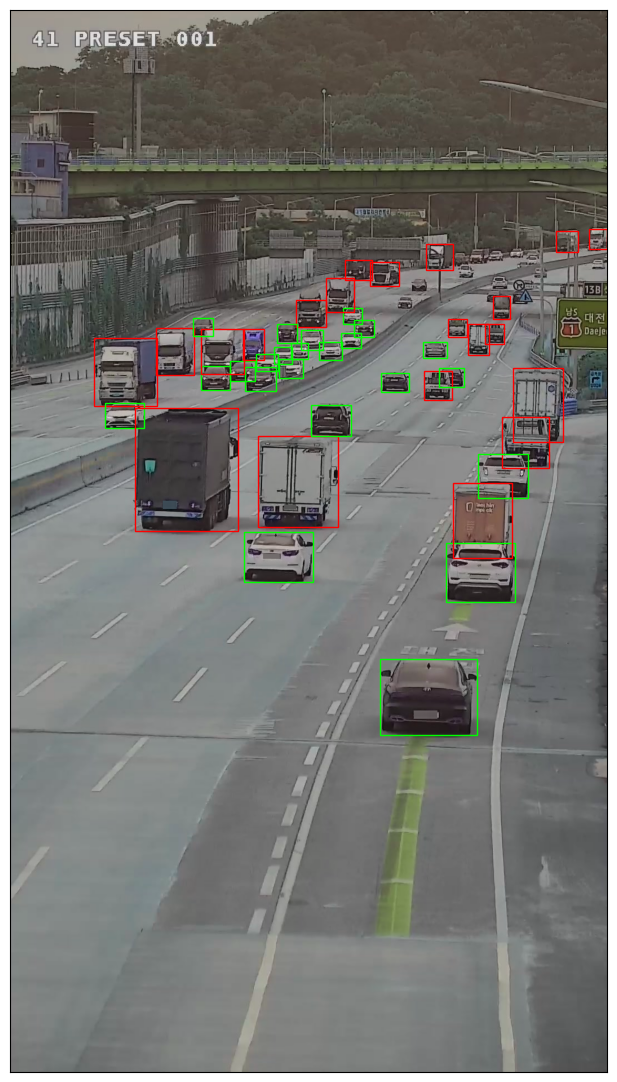

In [ ]:
plot_images(np.array([X_test[-1]]), np.array([Y_test[-1]]))